# Load the data

In [194]:
import pandas
import numpy
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
from sklearn import metrics
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)

In [195]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
plt.rcParams['figure.figsize'] = (15, 6)
url1 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS']
url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"
data = pandas.read_csv('poker-hand-training-true.data.txt', names=names)

data = data.sample(15000)

test = pandas.read_csv('poker-hand-testing.data.txt', names=names)



data0 = data[data['CLASS']==0]
test0 = test[test['CLASS']==0]

data1 = data[data['CLASS']==1]
test1 = test[test['CLASS']==1]

data2 = data[data['CLASS']==2]
test2 = test[test['CLASS']==2]

data3 = data[data['CLASS']==3]
test3 = test[test['CLASS']==3]

data4 = data[data['CLASS']==4]
test4 = test[test['CLASS']==4]

data5 = data[data['CLASS']==5]
test5 = test[test['CLASS']==5]

data6 = data[data['CLASS']==6]
test6 = test[test['CLASS']==6]

data7 = data[data['CLASS']==7]
test7 = test[test['CLASS']==7]

data8 = data[data['CLASS']==8]
test8 = test[test['CLASS']==8]

data9 = data[data['CLASS']==9]
test9 = test[test['CLASS']==9]





#test = test.sample(15000)

peek = data.head(10)
print(peek)
peektest = test.head(10)
print (peektest)

       S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
17390   2  12   2   3   4   3   3   3   1   5      3
10694   2   9   3   8   2   8   4  10   4   3      1
23373   3   8   2  12   1   1   1   6   4  11      0
8727    4   9   4  12   3  12   4   7   2  11      1
18150   1   6   4   4   3  10   2  13   1  11      0
12544   2   3   2  12   3   9   1  13   4  11      0
24838   2   6   2  12   2  13   3  12   4   8      1
2750    4  11   4  10   1   4   2   7   2  11      1
9045    1   7   4   9   2   3   4  11   2   1      0
21399   4   4   3   3   2  11   3   4   2   3      2
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   1   1   1  13   2   4   2   3   1  12      0
1   3  12   3   2   3  11   4   5   2   5      1
2   1   9   4   6   1   4   3   2   3   9      1
3   1   4   3  13   2  13   2   1   3   6      1
4   3  10   2   7   1   2   2  11   4   9      0
5   1   3   4   5   3   4   1  12   4   6      0
6   2   6   4  11   2   3   4   9   1   7      0
7   3   2   4   9   3   7

In [196]:
print( "The shape of data0 is ", data0.shape)
print( "The shape of data1 is ", data1.shape)
print( "The shape of data2 is ", data2.shape)
print( "The shape of data3 is ", data3.shape)
print( "The shape of data4 is ", data4.shape)
print( "The shape of data5 is ", data5.shape)
print( "The shape of data6 is ", data6.shape)
print( "The shape of data7 is ", data7.shape)
print( "The shape of data8 is ", data8.shape)
print( "The shape of data9 is ", data9.shape)

The shape of data0 is  (7519, 11)
The shape of data1 is  (6341, 11)
The shape of data2 is  (713, 11)
The shape of data3 is  (308, 11)
The shape of data4 is  (53, 11)
The shape of data5 is  (34, 11)
The shape of data6 is  (20, 11)
The shape of data7 is  (6, 11)
The shape of data8 is  (3, 11)
The shape of data9 is  (3, 11)


In [197]:
print( "The shape of data0 is ", test0.shape)
print( "The shape of data1 is ", test1.shape)
print( "The shape of data2 is ", test2.shape)
print( "The shape of data3 is ", test3.shape)
print( "The shape of data4 is ", test4.shape)
print( "The shape of data5 is ", test5.shape)
print( "The shape of data6 is ", test6.shape)
print( "The shape of data7 is ", test7.shape)
print( "The shape of data8 is ", test8.shape)
print( "The shape of data9 is ", test9.shape)

The shape of data0 is  (501209, 11)
The shape of data1 is  (422498, 11)
The shape of data2 is  (47622, 11)
The shape of data3 is  (21121, 11)
The shape of data4 is  (3885, 11)
The shape of data5 is  (1996, 11)
The shape of data6 is  (1424, 11)
The shape of data7 is  (230, 11)
The shape of data8 is  (12, 11)
The shape of data9 is  (3, 11)


In [198]:
framedata = [data0[:2000],data1[:2000],data2[:700],data3[:300],data4,data5,data6, data7, data8, data9,
            test0[:100],test1[:100],test2[:100],test3[:50],test4[:3],test5[:3],test6[:3], test7[:3], test8[:3], test9[:3]]
data = pandas.concat(framedata)

In [199]:
data.shape

(5487, 11)

In [200]:
framedata = [test0[:100],test1[:100],test2[:100],test3[:50],test4[:3],test5[:3],test6[:3], test7[:3], test8[:3], test9[:3]]
test = pandas.concat(framedata)

In [201]:
test.shape

(368, 11)

shape = data.shape
print(shape)

In [202]:
types = data.dtypes
print(types)

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object


In [203]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
description = data.describe()
print(description)

             S1        C1        S2        C2        S3        C3       S4        C4        S5  \
count  5487.000  5487.000  5487.000  5487.000  5487.000  5487.000  5487.00  5487.000  5487.000   
mean      2.488     6.995     2.500     7.026     2.506     6.992     2.51     6.892     2.496   
std       1.118     3.730     1.126     3.799     1.124     3.746     1.11     3.736     1.108   
min       1.000     1.000     1.000     1.000     1.000     1.000     1.00     1.000     1.000   
25%       1.000     4.000     1.000     4.000     1.000     4.000     2.00     4.000     2.000   
50%       2.000     7.000     2.000     7.000     3.000     7.000     3.00     7.000     2.000   
75%       3.000    10.000     4.000    10.000     4.000    10.000     3.00    10.000     3.000   
max       4.000    13.000     4.000    13.000     4.000    13.000     4.00    13.000     4.000   

             C5     CLASS  
count  5487.000  5487.000  
mean      6.982     0.995  
std       3.735     1.127  
min  

In [204]:
class_counts = data.groupby('CLASS').size()
print ('Classes on training data')
print(class_counts)

Classes on training data
CLASS
0    2100
1    2100
2     800
3     350
4      56
5      37
6      23
7       9
8       6
9       6
dtype: int64


In [205]:
class_counts = test.groupby('CLASS').size()
print ('Classes on testing data')
print(class_counts)

Classes on testing data
CLASS
0    100
1    100
2    100
3     50
4      3
5      3
6      3
7      3
8      3
9      3
dtype: int64


In [206]:
correlations = data.corr(method='pearson')
print(correlations)

          S1     C1     S2     C2     S3     C3     S4     C4     S5     C5  CLASS
S1     1.000 -0.031 -0.018  0.010 -0.012  0.006 -0.018 -0.004 -0.031  0.016  0.022
C1    -0.031  1.000  0.030  0.037 -0.014  0.025 -0.010  0.029  0.021  0.016  0.021
S2    -0.018  0.030  1.000  0.017 -0.031 -0.002 -0.032  0.021 -0.014  0.007  0.005
C2     0.010  0.037  0.017  1.000 -0.010  0.011  0.004  0.017  0.008  0.015 -0.010
S3    -0.012 -0.014 -0.031 -0.010  1.000  0.020 -0.031  0.005 -0.045 -0.009  0.024
C3     0.006  0.025 -0.002  0.011  0.020  1.000 -0.005  0.044  0.027  0.023  0.009
S4    -0.018 -0.010 -0.032  0.004 -0.031 -0.005  1.000 -0.008 -0.017 -0.010 -0.023
C4    -0.004  0.029  0.021  0.017  0.005  0.044 -0.008  1.000  0.025  0.018  0.024
S5    -0.031  0.021 -0.014  0.008 -0.045  0.027 -0.017  0.025  1.000  0.011  0.002
C5     0.016  0.016  0.007  0.015 -0.009  0.023 -0.010  0.018  0.011  1.000 -0.008
CLASS  0.022  0.021  0.005 -0.010  0.024  0.009 -0.023  0.024  0.002 -0.008  1.000


In [207]:
skew = data.skew()
print(skew)

S1       0.027
C1      -0.034
S2       0.002
C2       0.015
S3      -0.009
C3       0.007
S4      -0.017
C4       0.022
S5       0.006
C5       0.010
CLASS    1.963
dtype: float64


In [208]:
data.head()

S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
23373   3   8   2  12   1   1   1   6   4  11      0
18150   1   6   4   4   3  10   2  13   1  11      0
12544   2   3   2  12   3   9   1  13   4  11      0
9045    1   7   4   9   2   3   4  11   2   1      0
9980    3  11   4   6   3   1   4   4   2   3      0

In [209]:
data.tail()
data['CLASS'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [210]:
correlations = data.corr(method='pearson')
print(correlations)

          S1     C1     S2     C2     S3     C3     S4     C4     S5     C5  CLASS
S1     1.000 -0.031 -0.018  0.010 -0.012  0.006 -0.018 -0.004 -0.031  0.016  0.022
C1    -0.031  1.000  0.030  0.037 -0.014  0.025 -0.010  0.029  0.021  0.016  0.021
S2    -0.018  0.030  1.000  0.017 -0.031 -0.002 -0.032  0.021 -0.014  0.007  0.005
C2     0.010  0.037  0.017  1.000 -0.010  0.011  0.004  0.017  0.008  0.015 -0.010
S3    -0.012 -0.014 -0.031 -0.010  1.000  0.020 -0.031  0.005 -0.045 -0.009  0.024
C3     0.006  0.025 -0.002  0.011  0.020  1.000 -0.005  0.044  0.027  0.023  0.009
S4    -0.018 -0.010 -0.032  0.004 -0.031 -0.005  1.000 -0.008 -0.017 -0.010 -0.023
C4    -0.004  0.029  0.021  0.017  0.005  0.044 -0.008  1.000  0.025  0.018  0.024
S5    -0.031  0.021 -0.014  0.008 -0.045  0.027 -0.017  0.025  1.000  0.011  0.002
C5     0.016  0.016  0.007  0.015 -0.009  0.023 -0.010  0.018  0.011  1.000 -0.008
CLASS  0.022  0.021  0.005 -0.010  0.024  0.009 -0.023  0.024  0.002 -0.008  1.000


# Visulize the data

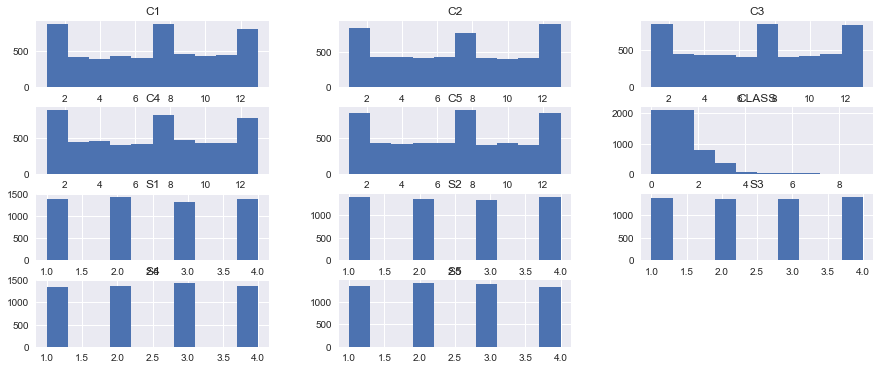

In [211]:
data.hist()
plt.show()

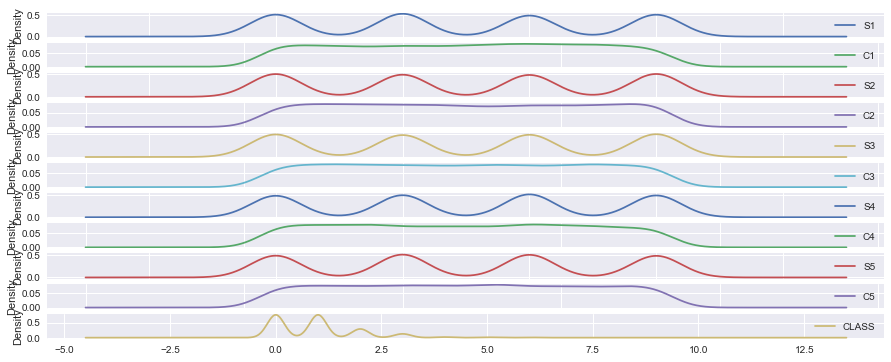

In [212]:
data.plot(kind='density', subplots=True,  sharex=False)
plt.show()

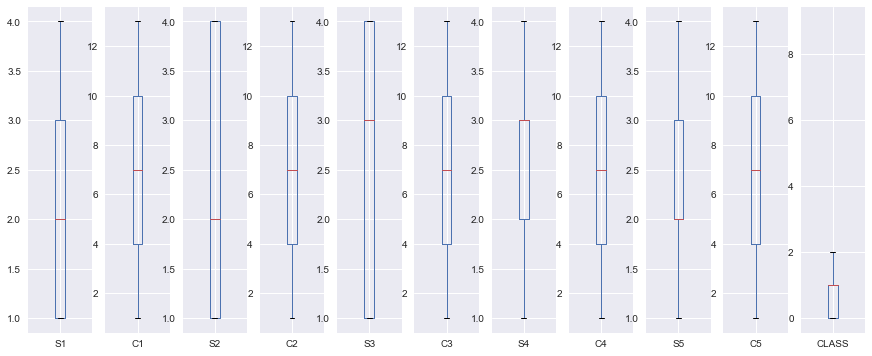

In [213]:
data.plot(kind='box', subplots=True,  sharex=False, sharey=False)
plt.show()

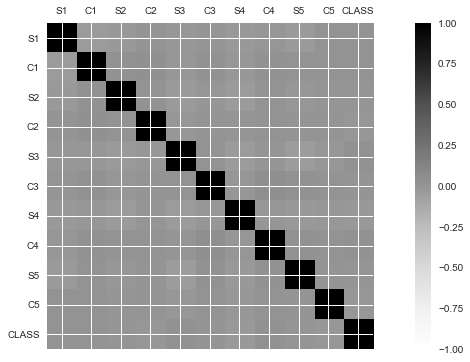

In [214]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

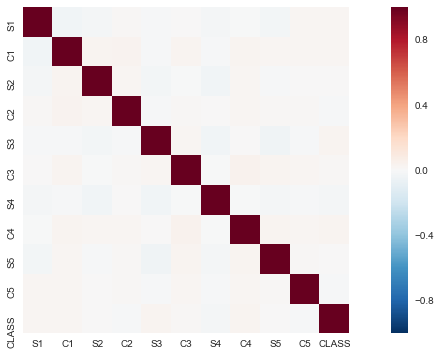

In [215]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

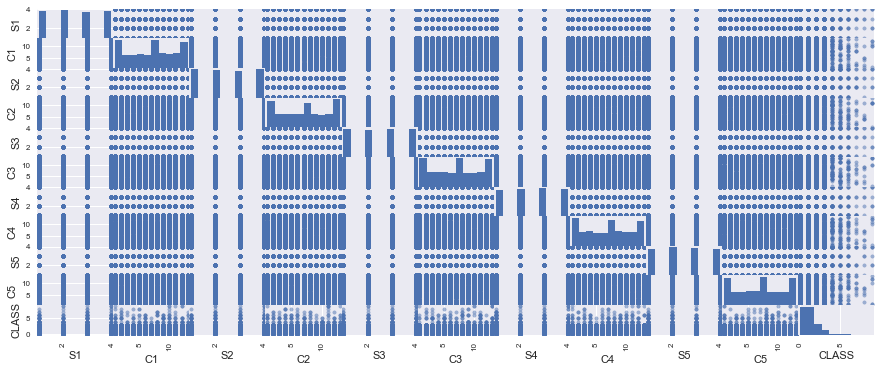

In [216]:
scatter_matrix(data)
plt.show()

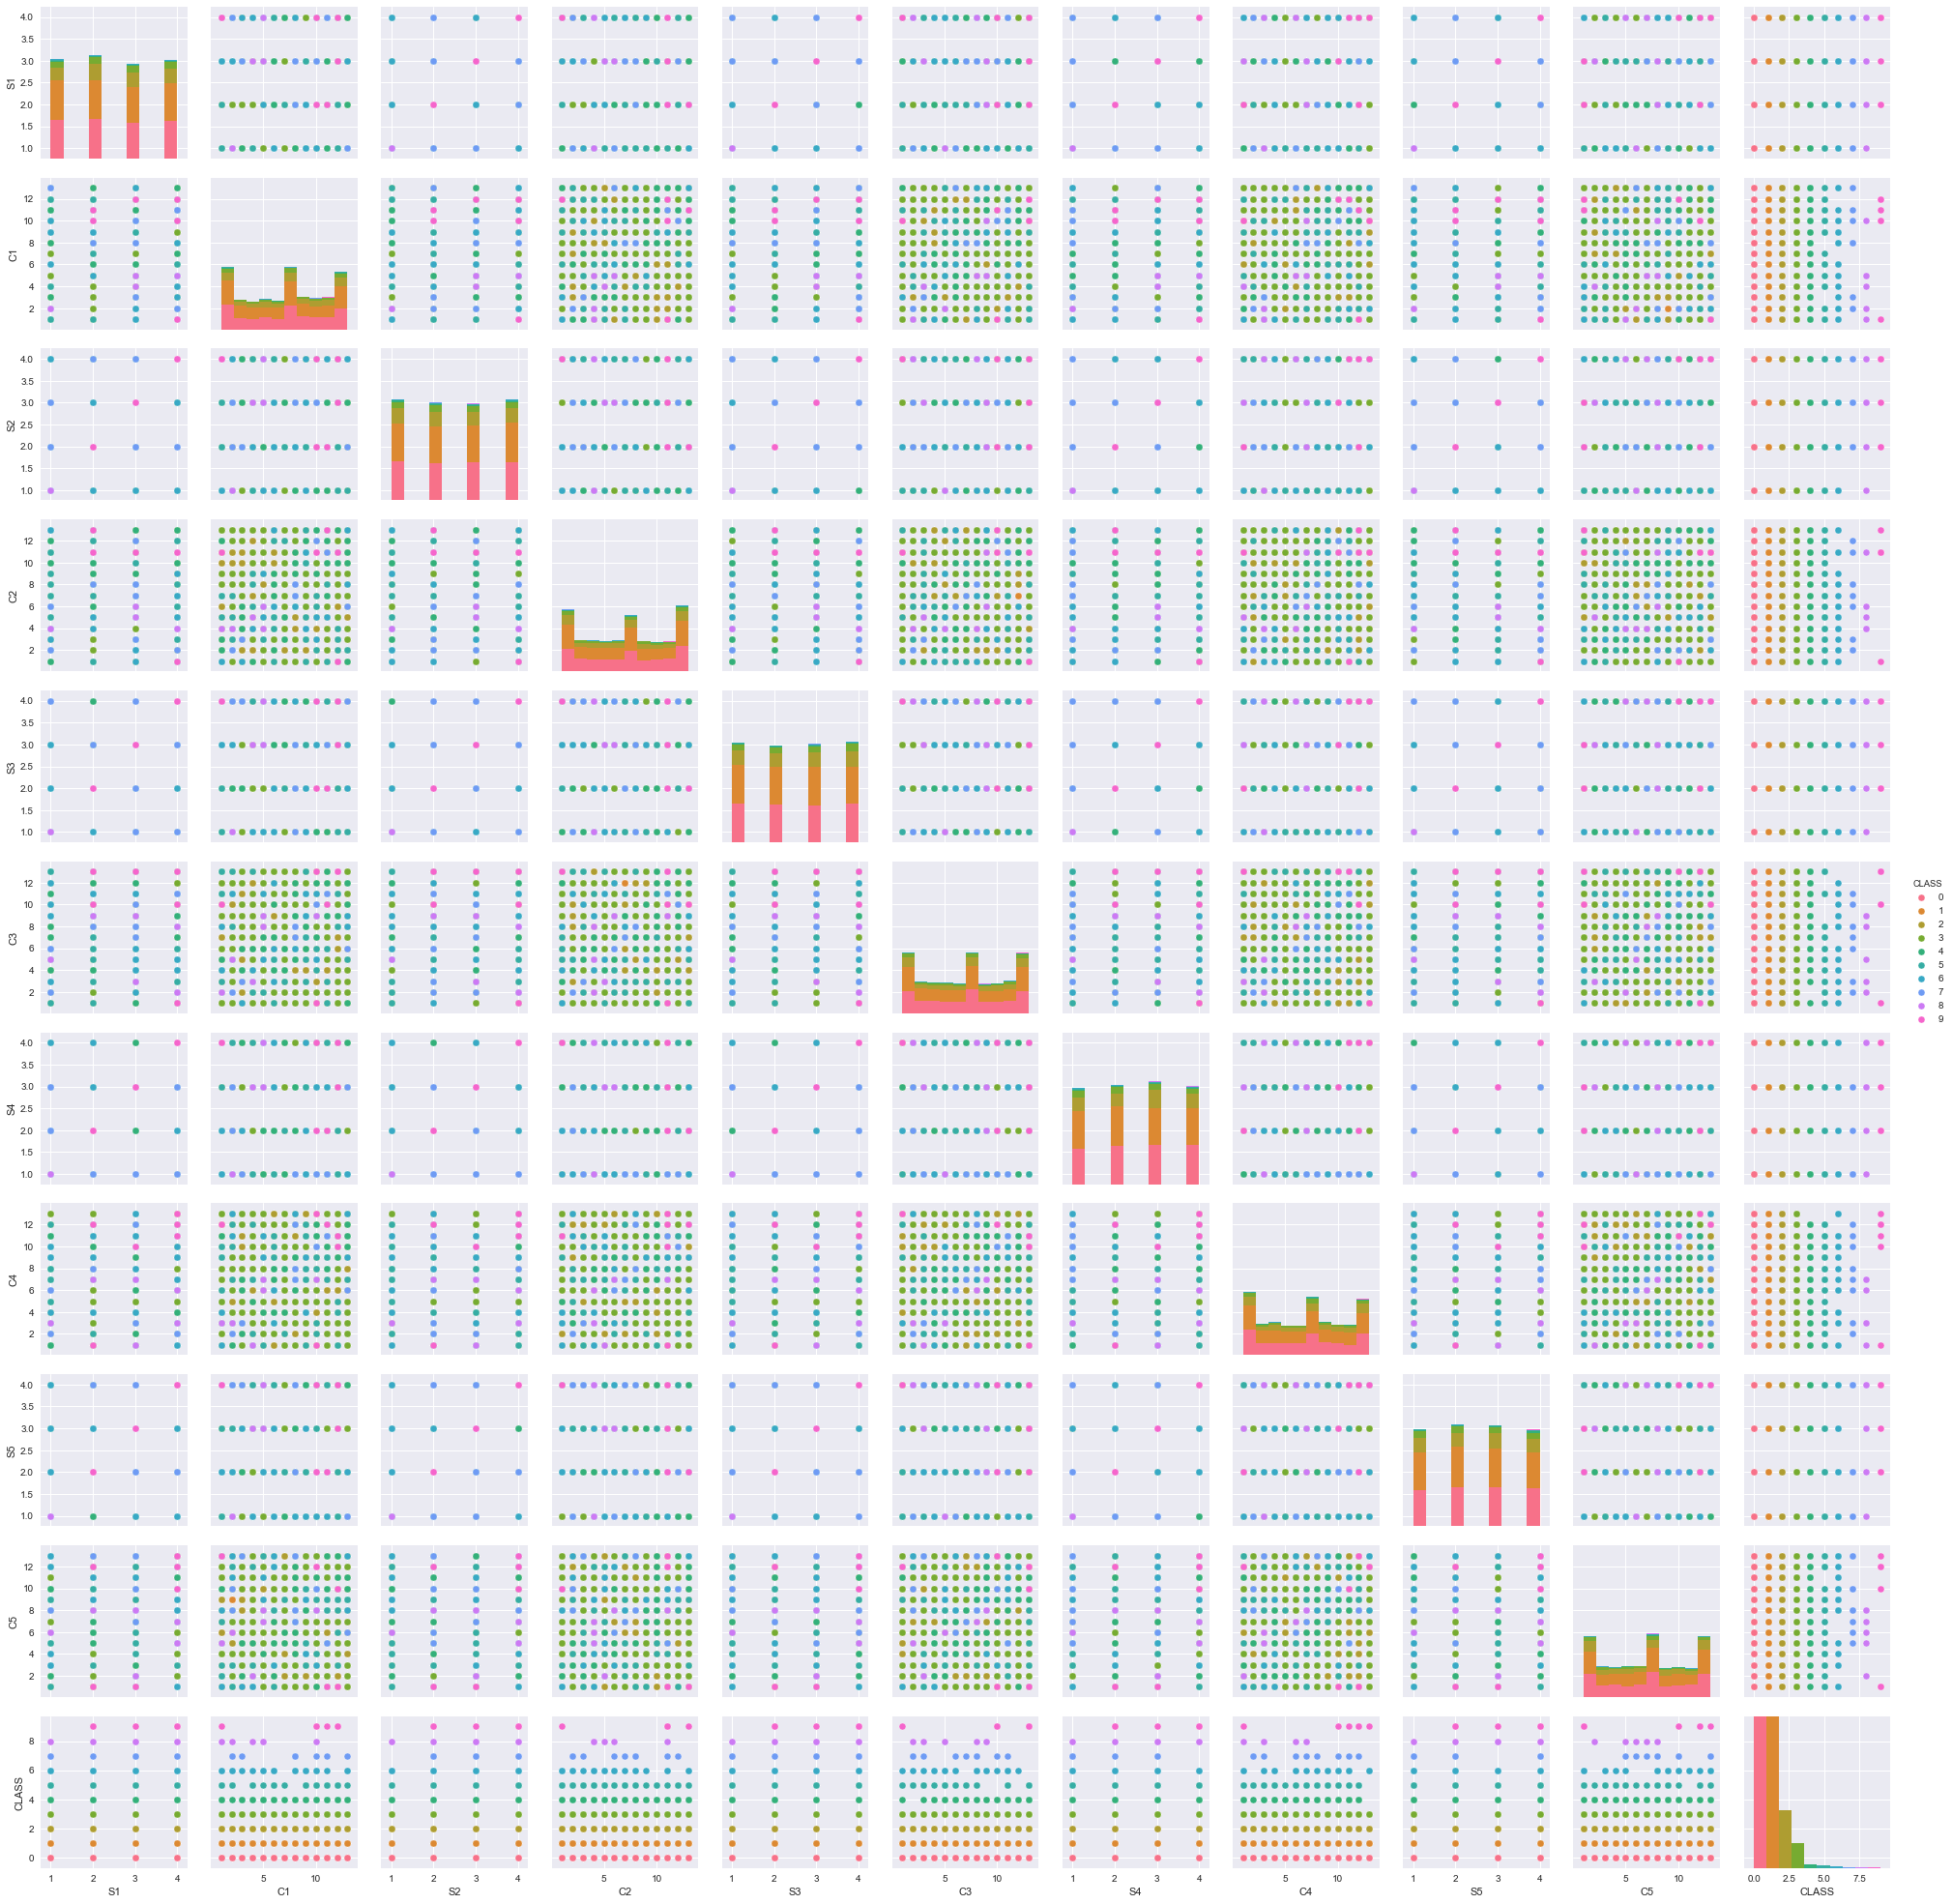

In [217]:
import seaborn as sns
sns.pairplot(data, hue='CLASS')

# Prepare the data for classification

In [218]:
from sklearn import preprocessing
# for training data
dataset = data.values
X = dataset[:,0:10].astype(float)
Y = dataset[:,10]
features = preprocessing.scale(X)
target = Y

In [219]:
# for testing data
datasetTest = test.values
X = datasetTest[:,0:10].astype(float)
Y = datasetTest[:,10]
X_deploy = preprocessing.scale(X)
y_deploy = Y

In [220]:
from sklearn.cross_validation import train_test_split
# Extracting 20% validation data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.20, random_state=17)

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 4389
Number of validation examples 1098
Number of testing examples 368


In [221]:
X_train = features
X_test  = X_deploy
y_train = target
y_test  = y_deploy

In [222]:
from sklearn.cross_validation import StratifiedShuffleSplit

## Preproccing

In [223]:
from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
X_deploy = preprocessing.normalize(X_deploy)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)
X_deploy = preprocessing.scale(X_deploy)

# Feature Selection

In [224]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.09386793  0.10299871  0.09784579  0.1014096   0.09707644  0.10253782
  0.09617264  0.10150287  0.09944086  0.10714736]


# Building classifiers

## KNN classifier
It turns out that k=5 is the best choose of k on the validation set

In [225]:
from sklearn.neighbors import KNeighborsClassifier
clf_neigh = KNeighborsClassifier(n_neighbors=5)
#Training
start_time = time.time()
clf_neigh.fit(X_train, y_train)
print("The time for training KNN is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_neigh.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of Knn : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, 
                                     target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))
       
       

The time for training KNN is  0.0065729618072509766 seconds 

The accuracy on validation dataset of Knn : 	 0.470108695652
             precision    recall  f1-score   support

          0       0.45      0.80      0.58       100
          1       0.43      0.59      0.50       100
          2       0.72      0.28      0.40       100
          3       0.44      0.08      0.14        50
          4       0.00      0.00      0.00         3
          5       0.67      0.67      0.67         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.50      0.47      0.42       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM classifier
### Linear SVM "LinearSVC"
It turns out that C=20 is the best on the validation set

In [226]:
from sklearn.svm import LinearSVC
clf_svm_linear = LinearSVC(C=20.0)
#Training
start_time = time.time()
clf_svm_linear.fit(X_train, y_train)
print("The time for training SVM is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_svm_linear.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of Linear SVC: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))

The time for training SVM is  3.2782671451568604 seconds 

The accuracy on validation dataset of Linear SVC: 	 0.258152173913
             precision    recall  f1-score   support

          0       0.26      0.42      0.32       100
          1       0.26      0.53      0.35       100
          2       0.00      0.00      0.00       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.14      0.26      0.18       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


###  SVM "SVC" with kernel='rbf' 
It turns out that C=5 is the best on the validation set


In [227]:
from sklearn.svm import SVC
clf_svm = SVC(C=5.0, kernel='rbf')
#Training
start_time = time.time()
clf_svm.fit(X_train, y_train)
print("The time for training SVM is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_svm.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of SVC: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))

The time for training SVM is  2.0362889766693115 seconds 

The accuracy on validation dataset of SVC: 	 0.453804347826
             precision    recall  f1-score   support

          0       0.48      0.71      0.57       100
          1       0.39      0.69      0.49       100
          2       0.65      0.22      0.33       100
          3       1.00      0.02      0.04        50
          4       0.00      0.00      0.00         3
          5       0.75      1.00      0.86         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       1.00      0.33      0.50         3
          9       0.00      0.00      0.00         3

avg / total       0.56      0.45      0.39       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decsion Tree classifier
### DT with Gini impurity "gini", CART (Classification and Regression Trees)
It turns out that min_samples_split=2 is the best on the validation set

In [228]:
# CART tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(min_samples_split=2)
#Training
start_time = time.time()
clf_dt.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of DT : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Decision Tree is  0.1274099349975586 seconds 

The accuracy on validation dataset of DT : 	 0.60597826087
             precision    recall  f1-score   support

          0       0.56      0.70      0.62       100
          1       0.55      0.61      0.58       100
          2       0.75      0.57      0.65       100
          3       0.65      0.52      0.58        50
          4       0.33      0.33      0.33         3
          5       0.40      0.67      0.50         3
          6       0.67      0.67      0.67         3
          7       0.67      0.67      0.67         3
          8       0.00      0.00      0.00         3
          9       1.00      0.67      0.80         3

avg / total       0.62      0.61      0.60       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### DT with “entropy” for the information gain, C4.5 (aka J48 is an open source Java Weka) and C5.0
It turns out that min_samples_split=2 is the best on the validation set

In [229]:
# Here I use C5.0 tree as its more accurate that C4.5 and more recent.
from sklearn.tree import DecisionTreeClassifier
clf_dt_IG = DecisionTreeClassifier(criterion='entropy', min_samples_split=2)
#Training
start_time = time.time()
clf_dt_IG.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_IG.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of DT : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Decision Tree is  0.3304927349090576 seconds 

The accuracy on validation dataset of DT : 	 0.614130434783
             precision    recall  f1-score   support

          0       0.60      0.65      0.62       100
          1       0.52      0.66      0.58       100
          2       0.70      0.57      0.63       100
          3       0.74      0.58      0.65        50
          4       0.50      0.33      0.40         3
          5       1.00      0.67      0.80         3
          6       1.00      0.33      0.50         3
          7       1.00      1.00      1.00         3
          8       0.50      0.33      0.40         3
          9       1.00      0.33      0.50         3

avg / total       0.64      0.61      0.62       368



 Ensemble methods

## Bagging Method


### Bagging Method with Knn


Using Best KNN classifier fitted the data, each built on random subsets of 50% of the samples and 50% of the features.

In [230]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
clf_dt_BGKN = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                             max_samples=0.5, max_features=0.5)
start_time = time.time()
clf_dt_BGKN.fit(X_train, y_train)
print("The time for training Bagging Knn is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_BGKN.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of Bagging_knn: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Bagging Knn is  0.02252197265625 seconds 

The accuracy on validation dataset of Bagging_knn: 	 0.426630434783
             precision    recall  f1-score   support

          0       0.41      0.75      0.53       100
          1       0.39      0.64      0.48       100
          2       0.89      0.16      0.27       100
          3       1.00      0.04      0.08        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.59      0.43      0.36       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Bagging Method with DT


Using Best DT with 'entropy', each built on random subsets of 50% of the samples and 50% of the features.

In [231]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
clf_dt_BGDT = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=2),
                             max_samples=0.5, max_features=0.5)
start_time = time.time()
clf_dt_BGDT.fit(X_train, y_train)
print("The time for training Bagging DT is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_BGDT.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of Bagging_DT: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Bagging DT is  0.39034080505371094 seconds 

The accuracy on validation dataset of Bagging_DT: 	 0.45652173913
             precision    recall  f1-score   support

          0       0.41      0.68      0.51       100
          1       0.43      0.75      0.55       100
          2       0.83      0.19      0.31       100
          3       1.00      0.06      0.11        50
          4       0.00      0.00      0.00         3
          5       1.00      0.33      0.50         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       1.00      0.67      0.80         3

avg / total       0.61      0.46      0.40       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Random Forest
DT with 'gini'

In [232]:
from sklearn.ensemble import RandomForestClassifier
clf_dt_RF = RandomForestClassifier()
#Training
start_time = time.time()
clf_dt_RF.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_RF.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of RF : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Decision Tree is  0.24684381484985352 seconds 

The accuracy on validation dataset of RF : 	 0.657608695652
             precision    recall  f1-score   support

          0       0.58      0.91      0.71       100
          1       0.57      0.69      0.63       100
          2       0.90      0.57      0.70       100
          3       0.95      0.42      0.58        50
          4       0.00      0.00      0.00         3
          5       1.00      0.33      0.50         3
          6       1.00      0.67      0.80         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       1.00      0.33      0.50         3

avg / total       0.71      0.66      0.65       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Ada Boost
DT with 'gini'

In [233]:
from sklearn.ensemble import AdaBoostClassifier
clf_dt_AD = AdaBoostClassifier()
#Training
start_time = time.time()
clf_dt_AD.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_AD.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of Ada boost : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Decision Tree is  0.4796919822692871 seconds 

The accuracy on validation dataset of Ada boost : 	 0.288043478261
             precision    recall  f1-score   support

          0       0.30      0.73      0.42       100
          1       0.28      0.33      0.30       100
          2       0.00      0.00      0.00       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.16      0.29      0.20       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes methods

In [234]:
from sklearn.naive_bayes import GaussianNB
clf_NB = GaussianNB()
#Training
start_time = time.time()
clf_NB.fit(X_train, y_train)
print("The time for training Naive Bayes is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_NB.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of NB: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Naive Bayes is  0.0037910938262939453 seconds 

The accuracy on validation dataset of NB: 	 0.279891304348
             precision    recall  f1-score   support

          0       0.26      0.52      0.35       100
          1       0.30      0.51      0.38       100
          2       0.00      0.00      0.00       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.15      0.28      0.20       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Linear Discriminant Analysis classifier

In [235]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_dt_LDA = LinearDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_LDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_LDA.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of LDA: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


The time for training Decision Tree is  0.006075143814086914 seconds 

The accuracy on validation dataset of LDA: 	 0.271739130435
             precision    recall  f1-score   support

          0       0.26      0.47      0.33       100
          1       0.29      0.53      0.37       100
          2       0.00      0.00      0.00       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.15      0.27      0.19       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Quadratic Discriminant Analysis classifier

In [236]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_dt_QDA = QuadraticDiscriminantAnalysis()
#Training
start_time = time.time()
clf_dt_QDA.fit(X_train, y_train)
print("The time for training Decision Tree is  %s seconds " % (time.time() - start_time))

# Make a prediction
y_pred = clf_dt_QDA.predict(X_test)
print ("\n===================================================================")
print ("The accuracy on validation dataset of QDA : \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))

The time for training Decision Tree is  0.0048961639404296875 seconds 

The accuracy on validation dataset of QDA : 	 0.339673913043
             precision    recall  f1-score   support

          0       0.37      0.66      0.47       100
          1       0.30      0.55      0.39       100
          2       0.57      0.04      0.07       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       0.00      0.00      0.00         3
          9       0.00      0.00      0.00         3

avg / total       0.34      0.34      0.25       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Neural Networks  classifier

In [252]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils

labelsTrain = np_utils.to_categorical(y_train)
labelsTest = np_utils.to_categorical(y_test)                                              
model = Sequential()
model.add(Dense(25,
                input_shape=(10,), 
                activation="relu",
                W_regularizer=l2(0.001)))
#model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
# Actual modelling
start_time = time.time()
model.fit(X_train, labelsTrain, verbose=1, batch_size=20, nb_epoch=100)
print("The time for training NN is  %s seconds " % (time.time() - start_time))
score, accuracy = model.evaluate(X_test, labelsTest, batch_size=20, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

Epoch 1/100
5487/5487 [==============================] - 0s - loss: 1.7183 - acc: 0.3392     

In [253]:
y_pred = model.predict_classes(X_test)
print ("===================================================================")
print ("The accuracy on validation dataset of Neural Network: \t", metrics.accuracy_score(y_test, y_pred))
print ("===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=['0' , '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9']))


 32/368 [=>............................] - ETA: 0s===================================================================
The accuracy on validation dataset of Neural Network: 	 0.342391304348
             precision    recall  f1-score   support

          0       0.40      0.61      0.48       100
          1       0.28      0.53      0.36       100
          2       0.60      0.06      0.11       100
          3       0.00      0.00      0.00        50
          4       0.00      0.00      0.00         3
          5       0.50      1.00      0.67         3
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         3
          8       1.00      0.33      0.50         3
          9       1.00      0.67      0.80         3

avg / total       0.37      0.34      0.28       368



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [254]:
path = './poker/'
sys.path.append("./poker")
model.save_weights('pokerModelbest.hdf5',overwrite=True)

In [255]:
np.save('./poker/X_train', X_train)
np.save('./poker/y_train', y_train)
np.save('./poker/X_test', X_test)
np.save('./poker/y_test', y_test)
np.save('./poker/X_deploy', X_deploy)
np.save('./poker/y_deploy', y_deploy)